驗證自己寫的Gradient Desecent有沒有問題

In [12]:
# 加這行jupyter才能畫圖
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

產生x,y資料

In [2]:
x = pd.Series(np.linspace(-5.0, 5.0, 100))
y = pd.Series()

假設實際f長這樣 y = ax**2 + b

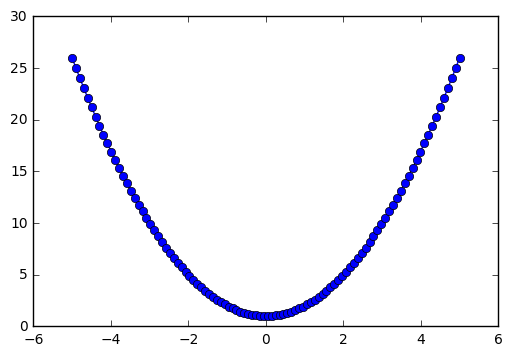

In [10]:
a = 1
b = 1

for i in range(0, len(x)):
    y = y.set_value(i, a*x[i]**2 + b)

plt.plot(x, y, 'o-')

定義 loss/error/cost function
L = sum(yhat - y)**2

對x偏微分
dx = 2*(yhat - (ax**2 + b))(-2ax)

對b偏微分
db = 2*(yhat - (ax**2 + b))(-1)

In [39]:
#每一輪update參數t次存放結果
min_err = pd.DataFrame(columns=('min_err', 'w', 'b'))

In [40]:
#每一輪實驗T次存放結果
E_min_err = pd.DataFrame(columns=('min_err', 'w', 'b'))

In [41]:
T = 30
t = 100

gradient desecent

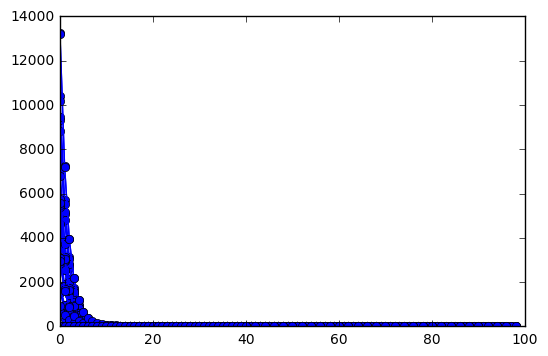

In [42]:
for T in range(0, T, 1):        
    #w, b初始值
    w = pd.Series([np.random.rand()]) # w=a 用隨機整數值 反而跑不出好結果 如2,1,...
    b = pd.Series([np.random.rand()])
    learning_rate = 0.00001 #learning rate太大會飛出去
    
    #update參數
    for t in range(0, t, 1):
        dw = pd.Series()   
        db = pd.Series()
        for i in range(0, len(x)):        
            dw.loc[i] = 2 * (y[i] - (w[t]*x[i]**2 + b[t])) * (-x[i]**2)
            db.loc[i] = 2 * (y[i] - (w[t]*x[i]**2 + b[t])) *(-1)
        w.loc[t+1] = w[t] - learning_rate * dw.sum()
        b.loc[t+1] = b[t] - learning_rate * db.sum()
     
    err = pd.Series()
    errs = pd.DataFrame(columns=('err', 'w', 'b'))
    
    #計算Loss Function
    for t in range(0, t, 1):
        for i in range(0, len(x)):
            err.loc[i] = (y[i] - (w[t] * x[i]**2 + b[t]))**2
        errs.loc[t] = np.array([err.sum(), w[t], b[t]])
            
    plt.plot(errs, 'bo-')
    #print(errs.min())
    
    #把最好的結果存起來
    idx = errs['err'].idxmin()
    E_min_err.loc[T] = np.array(errs.loc[idx])    

 從E_min_err找到最好的結果，錯誤最小


In [43]:
idx = E_min_err['min_err'].idxmin()
print E_min_err.loc[idx]

min_err    0.010996
w          1.001032
b          0.984270
Name: 12, dtype: float64
